In [1]:
import pandas as pd 
import numpy as np 
import pingouin as pg
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as sch
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
extreme_mh_results = pd.read_csv('../../Results/mahalanabis_bundle_metrics_extreme_pt.csv', index_col=0)
moderate_mh_results = pd.read_csv('../../Results/mahalanabis_bundle_metrics_moderate_pt.csv', index_col=0)

OUTDATED_IGNORE=1 

/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
names = []

for subset in ['set1']:#, 'set2', 'set3']:
    for col in extreme_mh_results.columns:
        if subset in col:
            names.append(col.split('_')[0])
subset_names = [name+'_mh_set1' for name in names]

In [4]:
corr = moderate_mh_results[subset_names].corr()

rho = corr.copy()
pval = moderate_mh_results[subset_names].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

pval = pval.astype(np.float64)
pre_p = pval.values.ravel()
reject, pvals_corr = pg.multicomp(pre_p, method='fdr_bh')
pvals_corr = pvals_corr.reshape(np.shape(pval.values))
pval[:] = pvals_corr

p = pval.applymap(lambda x: ''.join(['*' for t in [0.0001,0.001,0.01,0.05] if x<=t]))
p[p == ''] = 'ns'
rho = rho.round(2).astype(str) + ' \n(' + p + ')'



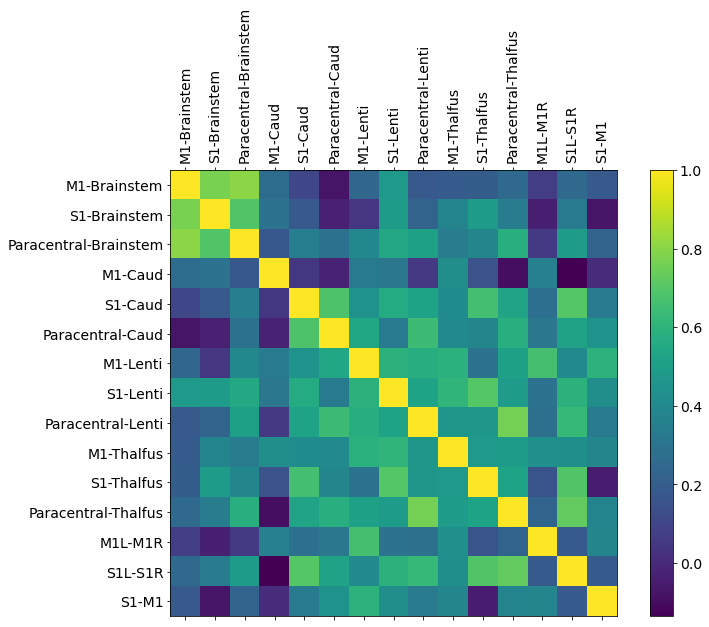

In [5]:
f = plt.figure(figsize=(12, 8))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(corr.shape[1]), names, fontsize=14, rotation=90)
plt.yticks(range(corr.shape[1]), names, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [6]:
from matplotlib.colors import  LinearSegmentedColormap
 
def get_custom_color_palette_hash():
    return LinearSegmentedColormap.from_list("", [
        '#FFFFF0', '#FFFFF0', '#D2691E'
    ])
cmap = get_custom_color_palette_hash()


<Figure size 864x576 with 0 Axes>

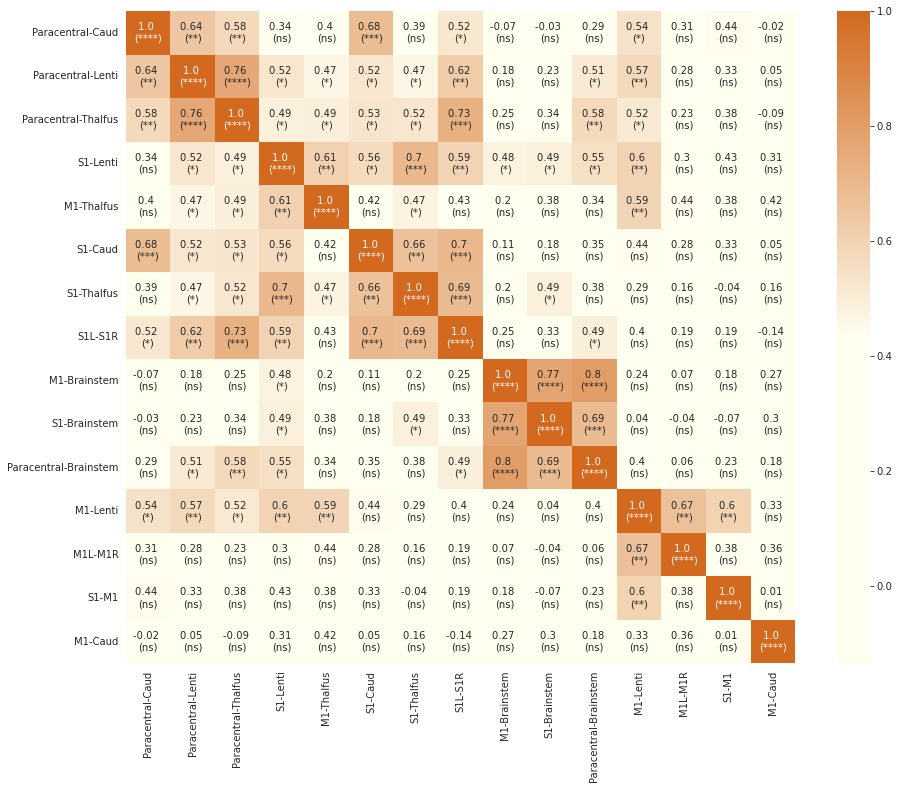

In [7]:
new_corr = corr.copy()

d = sch.distance.pdist(new_corr.values)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [subset_names[i] for i in list((np.argsort(ind)))]
new_order = [col.split('_')[0] for col in columns]

new_corr = new_corr.reindex(columns, axis=1)
new_corr = new_corr.reindex(columns, axis=0)

new_rho = rho.copy()
new_rho= new_rho.reindex(columns, axis=1)
new_rho= new_rho.reindex(columns, axis=0)

f = plt.figure(figsize=(12, 8))
#plt.matshow(new_corr, fignum=f.number)

mask = np.zeros_like(new_corr)
mask[np.triu_indices_from(mask)] = True


#sns.light_palette("chocolate", as_cmap=True)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(new_corr, annot = new_rho.values, fmt="", 
                     xticklabels=new_order, yticklabels=new_order, cmap=cmap) #, mask = mask)

#plt.xticks(range(new_corr.shape[1]), new_order, fontsize=14, rotation=90)
#plt.yticks(range(new_corr.shape[1]), new_order, fontsize=14)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
plt.show()

In [8]:
new_rho

,Paracentral-Caud_mh_set1,Paracentral-Lenti_mh_set1,Paracentral-Thalfus_mh_set1,S1-Lenti_mh_set1,M1-Thalfus_mh_set1,S1-Caud_mh_set1,S1-Thalfus_mh_set1,S1L-S1R_mh_set1,M1-Brainstem_mh_set1,S1-Brainstem_mh_set1,Paracentral-Brainstem_mh_set1,M1-Lenti_mh_set1,M1L-M1R_mh_set1,S1-M1_mh_set1,M1-Caud_mh_set1
Paracentral-Caud_mh_set1,1.0 \n(****),0.64 \n(**),0.58 \n(**),0.34 \n(ns),0.4 \n(ns),0.68 \n(***),0.39 \n(ns),0.52 \n(*),-0.07 \n(ns),-0.03 \n(ns),0.29 \n(ns),0.54 \n(*),0.31 \n(ns),0.44 \n(ns),-0.02 \n(ns)
Paracentral-Lenti_mh_set1,0.64 \n(**),1.0 \n(****),0.76 \n(****),0.52 \n(*),0.47 \n(*),0.52 \n(*),0.47 \n(*),0.62 \n(**),0.18 \n(ns),0.23 \n(ns),0.51 \n(*),0.57 \n(**),0.28 \n(ns),0.33 \n(ns),0.05 \n(ns)
Paracentral-Thalfus_mh_set1,0.58 \n(**),0.76 \n(****),1.0 \n(****),0.49 \n(*),0.49 \n(*),0.53 \n(*),0.52 \n(*),0.73 \n(***),0.25 \n(ns),0.34 \n(ns),0.58 \n(**),0.52 \n(*),0.23 \n(ns),0.38 \n(ns),-0.09 \n(ns)
S1-Lenti_mh_set1,0.34 \n(ns),0.52 \n(*),0.49 \n(*),1.0 \n(****),0.61 \n(**),0.56 \n(*),0.7 \n(***),0.59 \n(**),0.48 \n(*),0.49 \n(*),0.55 \n(*),0.6 \n(**),0.3 \n(ns),0.43 \n(ns),0.31 \n(ns)
M1-Thalfus_mh_set1,0.4 \n(ns),0.47 \n(*),0.49 \n(*),0.61 \n(**),1.0 \n(****),0.42 \n(ns),0.47 \n(*),0.43 \n(ns),0.2 \n(ns),0.38 \n(ns),0.34 \n(ns),0.59 \n(**),0.44 \n(ns),0.38 \n(ns),0.42 \n(ns)
S1-Caud_mh_set1,0.68 \n(***),0.52 \n(*),0.53 \n(*),0.56 \n(*),0.42 \n(ns),1.0 \n(****),0.66 \n(**),0.7 \n(***),0.11 \n(ns),0.18 \n(ns),0.35 \n(ns),0.44 \n(ns),0.28 \n(ns),0.33 \n(ns),0.05 \n(ns)
S1-Thalfus_mh_set1,0.39 \n(ns),0.47 \n(*),0.52 \n(*),0.7 \n(***),0.47 \n(*),0.66 \n(**),1.0 \n(****),0.69 \n(***),0.2 \n(ns),0.49 \n(*),0.38 \n(ns),0.29 \n(ns),0.16 \n(ns),-0.04 \n(ns),0.16 \n(ns)
S1L-S1R_mh_set1,0.52 \n(*),0.62 \n(**),0.73 \n(***),0.59 \n(**),0.43 \n(ns),0.7 \n(***),0.69 \n(***),1.0 \n(****),0.25 \n(ns),0.33 \n(ns),0.49 \n(*),0.4 \n(ns),0.19 \n(ns),0.19 \n(ns),-0.14 \n(ns)
M1-Brainstem_mh_set1,-0.07 \n(ns),0.18 \n(ns),0.25 \n(ns),0.48 \n(*),0.2 \n(ns),0.11 \n(ns),0.2 \n(ns),0.25 \n(ns),1.0 \n(****),0.77 \n(****),0.8 \n(****),0.24 \n(ns),0.07 \n(ns),0.18 \n(ns),0.27 \n(ns)
S1-Brainstem_mh_set1,-0.03 \n(ns),0.23 \n(ns),0.34 \n(ns),0.49 \n(*),0.38 \n(ns),0.18 \n(ns),0.49 \n(*),0.33 \n(ns),0.77 \n(****),1.0 \n(****),0.69 \n(***),0.04 \n(ns),-0.04 \n(ns),-0.07 \n(ns),0.3 \n(ns)


# t-test results 

In [9]:
extreme = pd.read_csv('../../Results/new_mahalanobis_extreme_group_ordering.csv', index_col=0)[['region1', 'region2', 'corrected_p_set1', 'corrected_p_set2', 'corrected_p_set3']]
moderate = pd.read_csv('../../Results/new_mahalanobis_moderate_group_ordering.csv', index_col=0)  [['region1', 'region2', 'corrected_p_set1', 'corrected_p_set2', 'corrected_p_set3']]

In [10]:
names = [ 'S1-Brainstem', 'M1-Brainstem','Paracentral-Brainstem',
              'S1-Thalfus','M1-Thalfus','Paracentral-Thalfus', 
            'S1-Caud','M1-Caud','Paracentral-Caud',
            'S1-Lenti','M1-Lenti', 'Paracentral-Lenti',  
             'S1L-S1R','M1L-M1R',
            'S1-M1' ]

tract_ord_names = [
     'S1-Bstem','M1-Bstem','ParaC-Bstem',
    'S1-Thal','M1-Thal','ParaC-Thal',
     'S1-Caud','M1-Caud','ParaC-Caud',
     'S1-Lenti','M1-Lenti','ParaC-Lenti', 
    'S1$_L$-S1$_R$','M1$_L$-M1$_R$',
    'S1-M1' ]



In [11]:
from matplotlib.colors import  LinearSegmentedColormap
 
def get_custom_color_palette_hash():
    return LinearSegmentedColormap.from_list("", [
     '#D2691E','#FFFFF0', '#FFFFF0'
    ])
cmap = get_custom_color_palette_hash()


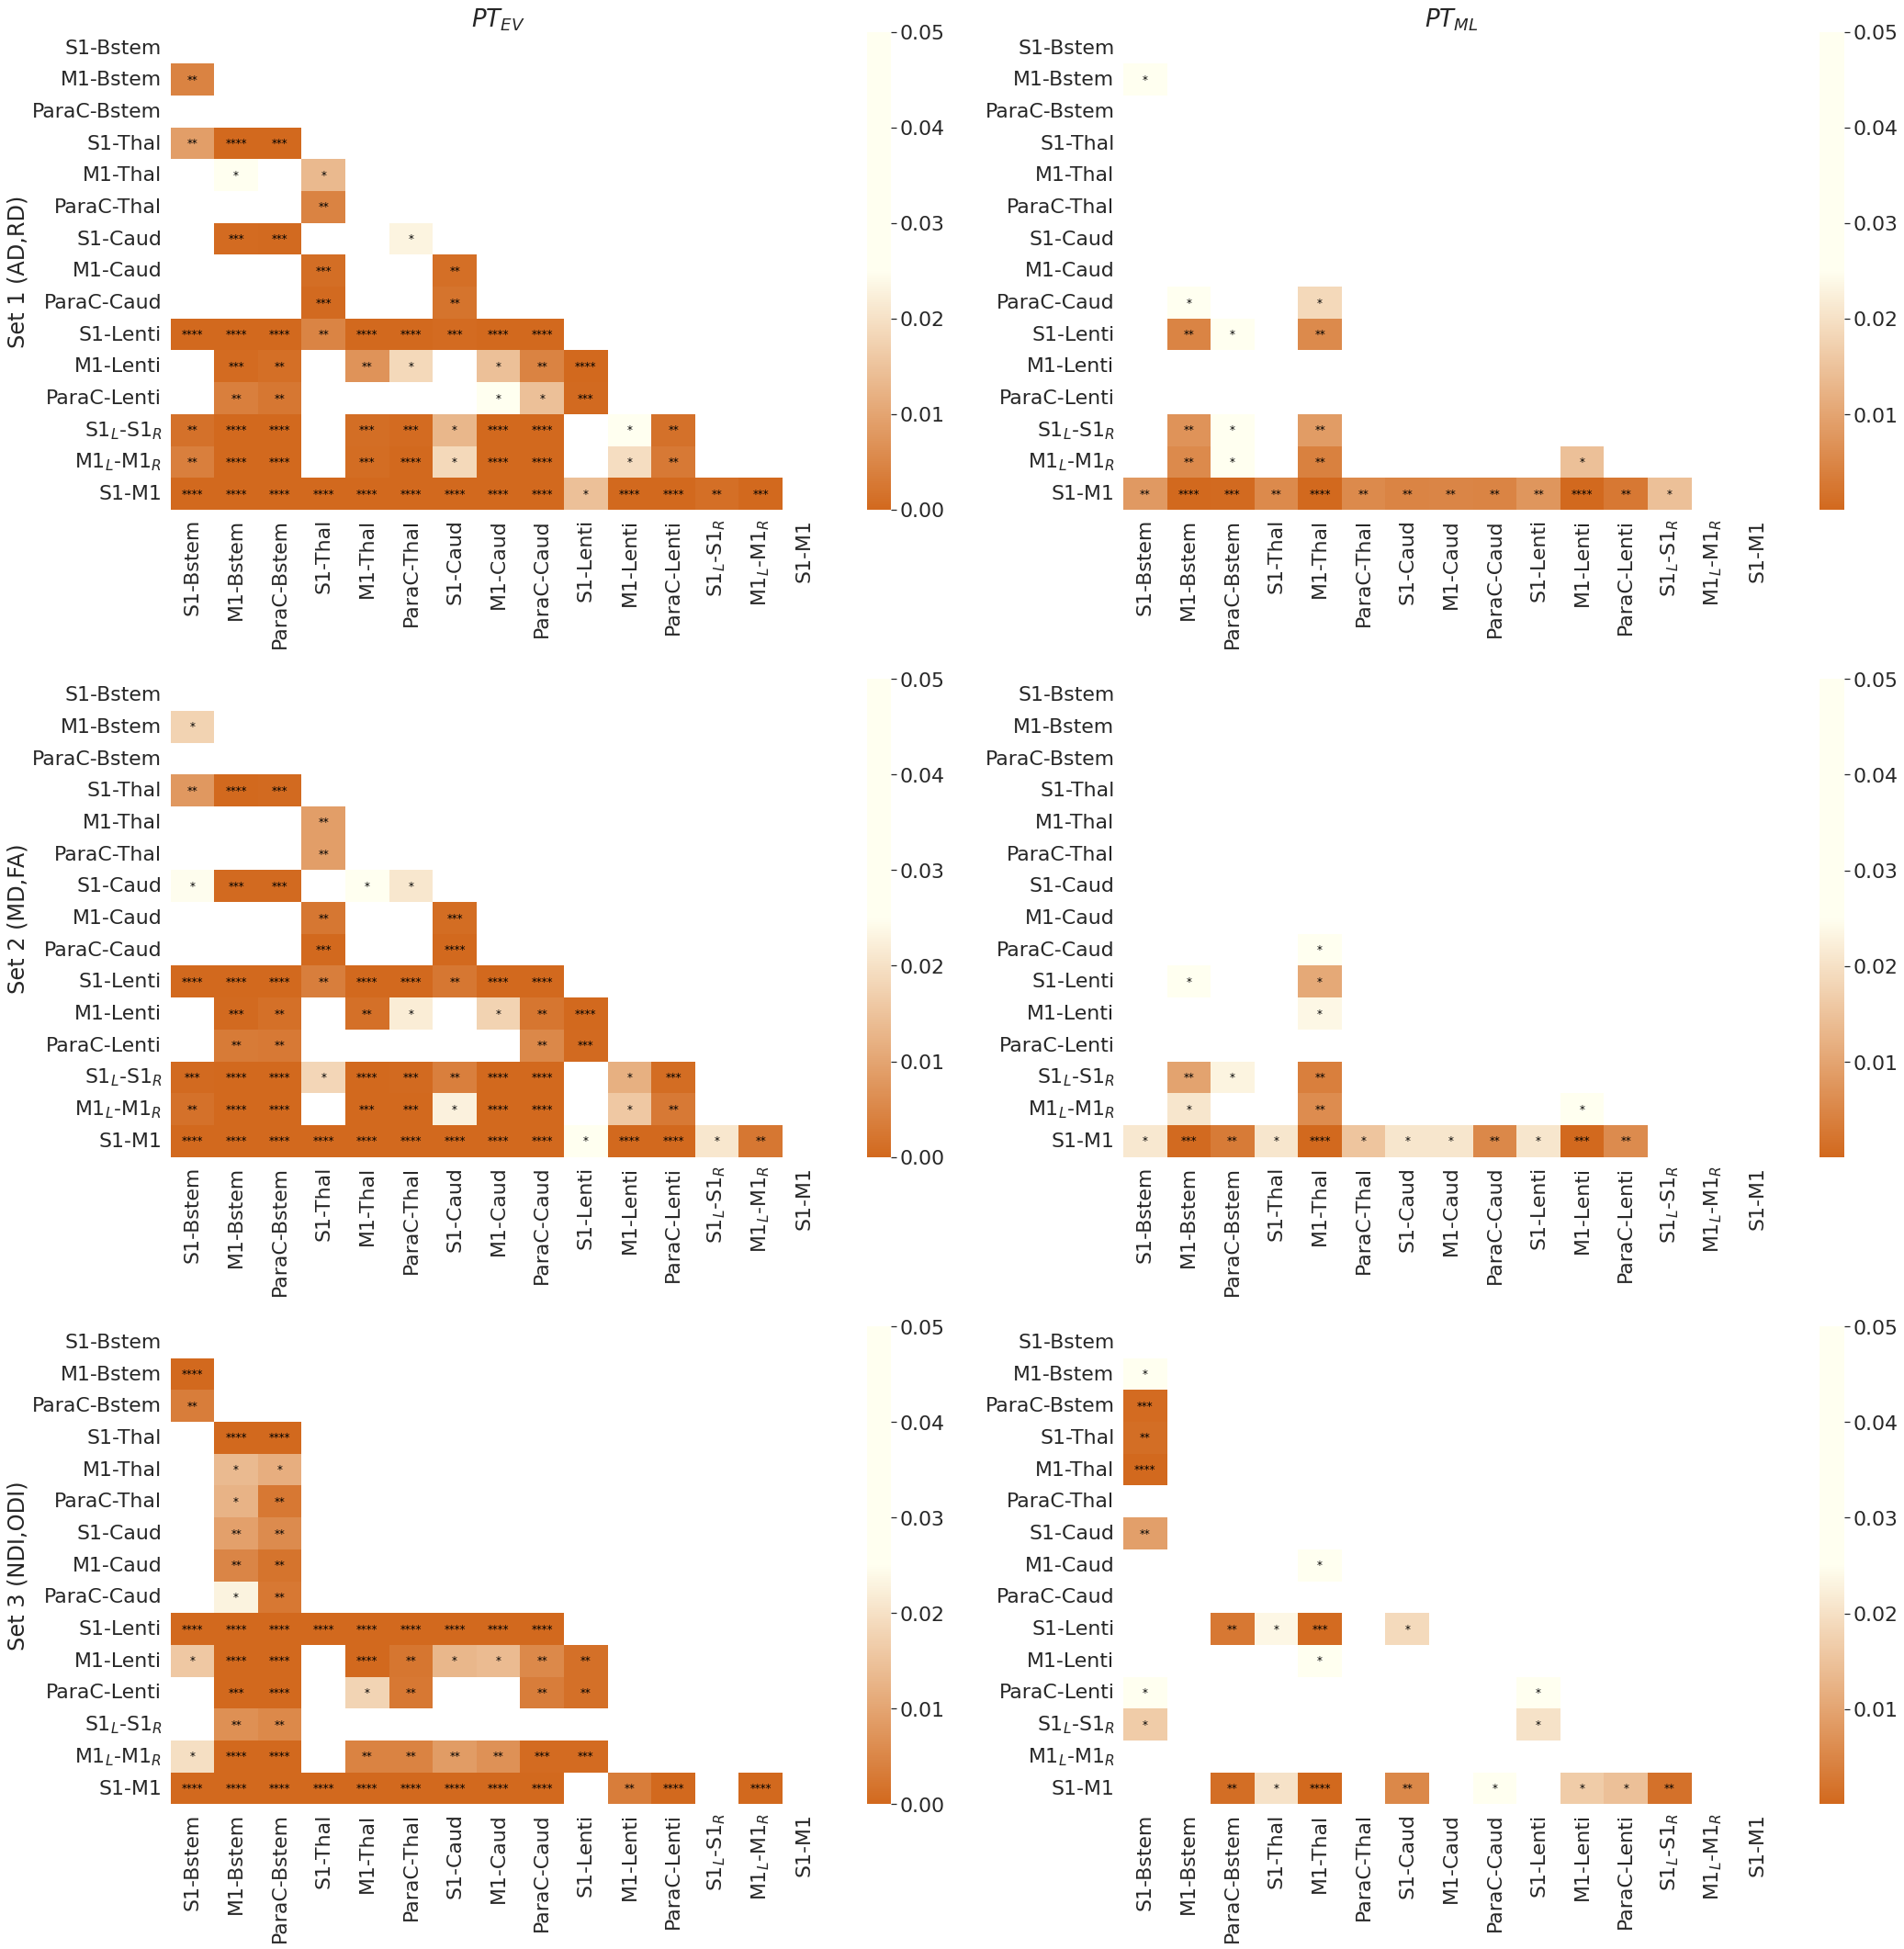

In [21]:
fig, axs = plt.subplots(3,2, figsize=(30,30))#, sharex=True)
    
for i, subset in enumerate(["corrected_p_set1", "corrected_p_set2", "corrected_p_set3"]):

    set_name = subset.split('_')[-1]
    subset_names = [name+'_mh_{}'.format(set_name) for name in names]
    
    if set_name == 'set1':
        title = 'Set 1 (AD,RD)'
    elif set_name == 'set2':
        title = 'Set 2 (MD,FA)'
    else:
        title = 'Set 3 (NDI,ODI)'
    
    
    ### EXTREME 
    df1 = pd.pivot_table(extreme, values=subset, index=["region2"], columns="region1", fill_value=np.nan) 
    df2 = pd.pivot_table(extreme, values=subset, index=["region1"], columns="region2", fill_value=np.nan)

    df1= df1.reindex(names, axis=1)
    df1= df1.reindex(names, axis=0)

    df2= df2.reindex(names, axis=1)
    df2= df2.reindex(names, axis=0)

    df = df1.copy()
    df[df.isnull()] = df2
    
    df= df.reindex(names, axis=1)
    df= df.reindex(names, axis=0)

    df[df>0.05] = np.nan
    
    p_ttest = df.applymap(lambda x: ''.join(['*' for t in [0.0001,0.001,0.01,0.05] if x<=t]))
    p_ttest[p_ttest == ''] = 'ns'

    #df = df.reset_index()
    
    trimask = np.triu(np.ones_like(df, dtype=bool))

    with sns.axes_style("white"):
        #f, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(df, annot = p_ttest, fmt="", ax= axs[i,0], mask=trimask, annot_kws={'size':12, 'color':'black'},
                     xticklabels=tract_ord_names, yticklabels=tract_ord_names, cmap=cmap, vmax=0.05) #, mask = mask)

        axs[i,0].set_xlabel('')
        axs[i,0].set_ylabel('')
        
        axs[i,0].set_ylabel(title, fontsize=24)
                
     
    ### MODERATE 
    
    df1 = pd.pivot_table(moderate, values=subset, index=["region2"], columns="region1", fill_value=np.nan) 
    df2 = pd.pivot_table(moderate, values=subset, index=["region1"], columns="region2", fill_value=np.nan)

    df1= df1.reindex(names, axis=1)
    df1= df1.reindex(names, axis=0)

    df2= df2.reindex(names, axis=1)
    df2= df2.reindex(names, axis=0)

    df = df1.copy()
    df[df.isnull()] = df2
    
    df= df.reindex(names, axis=1)
    df= df.reindex(names, axis=0)

    df[df>0.05] = np.nan
    
    p_ttest = df.applymap(lambda x: ''.join(['*' for t in [0.0001,0.001,0.01,0.05] if x<=t]))
    p_ttest[p_ttest == ''] = 'ns'

    #df = df.reset_index()

    with sns.axes_style("white"):
        #f, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(df, annot = p_ttest, fmt="", ax= axs[i,1], mask=trimask, annot_kws={'size':12, 'color':'black'},
                     xticklabels=tract_ord_names, yticklabels=tract_ord_names, cmap=cmap, vmax=0.05) #, mask = mask)
        axs[i,1].set_xlabel('')
        axs[i,1].set_ylabel('')
        
#sns.set_style(style='white')
sns.set(font_scale=2) 
sns.set_style(style='white')

axs[0,0].set_title('$PT_{EV}$', fontsize = 26)
axs[0,1].set_title('$PT_{ML}$', fontsize = 26)

plt.tight_layout()
plt.savefig('../../Results/figures/Mahalanobis_ttest_matrices.png', dpi=600 )
plt.show()

### clustering 


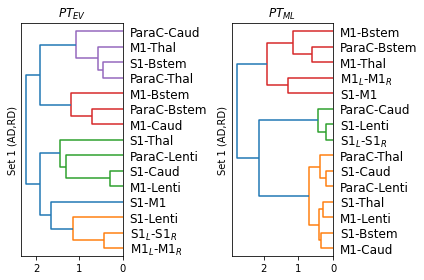

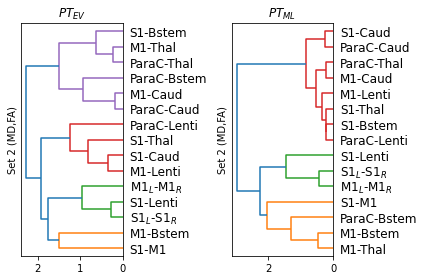

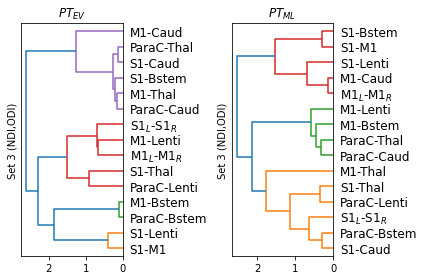

In [100]:
from scipy.cluster import hierarchy

#fig = plt.figure(figsize=(30,30))

for i, subset in enumerate(["corrected_p_set1", "corrected_p_set2", "corrected_p_set3"]):

    set_name = subset.split('_')[-1]
    subset_names = [name+'_mh_{}'.format(set_name) for name in names]
    
    if set_name == 'set1':
        title = 'Set 1 (AD,RD)'
    elif set_name == 'set2':
        title = 'Set 2 (MD,FA)'
    else:
        title = 'Set 3 (NDI,ODI)'
    
    
    ### EXTREME 
    df1 = pd.pivot_table(extreme, values=subset, index=["region2"], columns="region1", fill_value=np.nan) 
    df2 = pd.pivot_table(extreme, values=subset, index=["region1"], columns="region2", fill_value=np.nan)

    df1= df1.reindex(names, axis=1)
    df1= df1.reindex(names, axis=0)

    df2= df2.reindex(names, axis=1)
    df2= df2.reindex(names, axis=0)

    df = df1.copy()
    df[df.isnull()] = df2
    df[df.isnull()] = 1
    
    #df= df.reindex(names, axis=1)
    #df= df.reindex(names, axis=0)
    #df[df>0.05] = np.nan
    
    p_ttest = df.applymap(lambda x: ''.join(['*' for t in [0.0001,0.001,0.01,0.05] if x<=t]))
    p_ttest[p_ttest == ''] = 'ns'
    
    d = sch.distance.pdist(df.values)   # vector of ('55' choose 2) pairwise distances
    L = sch.linkage(d, method='complete')
    #ind = sch.fcluster(L, 0.5*d.max(), 'distance')
    #columns = [subset_names[i] for i in list((np.argsort(ind)))]
    #new_names = [tract_ord_names[i] for i in list((np.argsort(ind)))]
    #new_order = [col.split('_')[0] for col in columns]
    
    plt.subplot(1, 2, 1)
    plt.title('$PT_{EV}$')
    dn = hierarchy.dendrogram(L, orientation='left', labels=tract_ord_names,distance_sort='descending')
    plt.ylabel(title)
    
    
    ### moderate
    df1 = pd.pivot_table(moderate, values=subset, index=["region2"], columns="region1", fill_value=np.nan) 
    df2 = pd.pivot_table(moderate, values=subset, index=["region1"], columns="region2", fill_value=np.nan)

    df1= df1.reindex(names, axis=1)
    df1= df1.reindex(names, axis=0)

    df2= df2.reindex(names, axis=1)
    df2= df2.reindex(names, axis=0)

    df = df1.copy()
    df[df.isnull()] = df2
    df[df.isnull()] = 1
    
    #df= df.reindex(names, axis=1)
    #df= df.reindex(names, axis=0)
    #df[df>0.05] = np.nan
    
    p_ttest = df.applymap(lambda x: ''.join(['*' for t in [0.0001,0.001,0.01,0.05] if x<=t]))
    p_ttest[p_ttest == ''] = 'ns'
    
    d = sch.distance.pdist(df.values)   # vector of ('55' choose 2) pairwise distances
    L = sch.linkage(d, method='complete')
    #ind = sch.fcluster(L, 0.5*d.max(), 'distance')
    #columns = [subset_names[i] for i in list((np.argsort(ind)))]
    #new_names = [tract_ord_names[i] for i in list((np.argsort(ind)))]
    #new_order = [col.split('_')[0] for col in columns]
    
    plt.subplot(1, 2, 2)
    plt.title('$PT_{ML}$')
    dn = hierarchy.dendrogram(L, orientation='left', labels=tract_ord_names,distance_sort='descending')
    plt.ylabel(title)
    
    plt.tight_layout()
    plt.show()

In [144]:
### clustering 
df1 = pd.pivot_table(extreme, values="corrected_p_set1", index=["region2"], columns="region1", fill_value=np.nan) 
df2 = pd.pivot_table(extreme, values="corrected_p_set1", index=["region1"], columns="region2", fill_value=np.nan)

df1= df1.reindex(names, axis=1)
df1= df1.reindex(names, axis=0)

df2= df2.reindex(names, axis=1)
df2= df2.reindex(names, axis=0)

df = df1.copy()
df[df.isnull()] = df2
df[df.isnull()] = 1

#df.fillna(1, inplace=True)

p_ttest = df.applymap(lambda x: ''.join(['*' for t in [0.0001,0.001,0.01,0.05] if x<=t]))
p_ttest[p_ttest == ''] = 'ns'


In [145]:
d = sch.distance.pdist(df.values)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [subset_names[i] for i in list((np.argsort(ind)))]
new_names = [tract_ord_names[i] for i in list((np.argsort(ind)))]
new_order = [col.split('_')[0] for col in columns]


In [146]:
df = df.reindex(new_order, axis=1)
df = df.reindex(new_order, axis=0)

p_ttest = p_ttest.reindex(new_order, axis=1)
p_ttest = p_ttest.reindex(new_order, axis=0)

df[df > 0.05] = np.nan

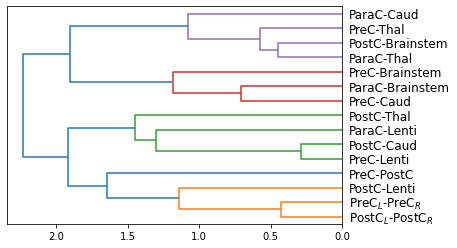

In [156]:
from scipy.cluster import hierarchy
dn = hierarchy.dendrogram(L, orientation='left', labels=tract_ord_names,distance_sort='descending')

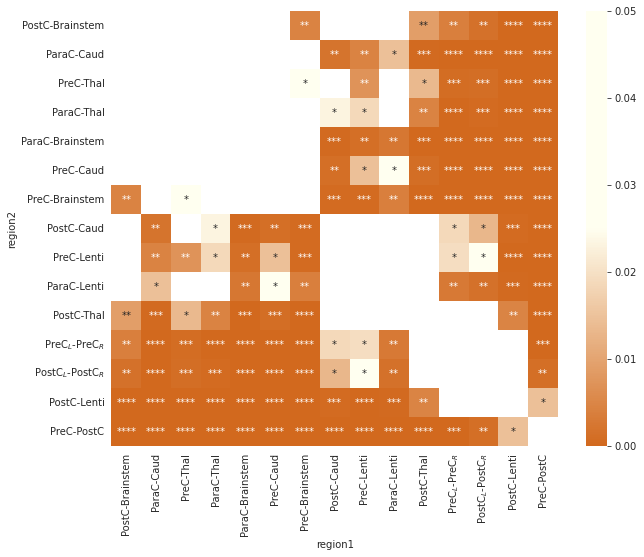

In [152]:
#mask = np.zeros_like(p_ttest, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(df, annot = p_ttest, fmt="", 
                     xticklabels=new_names, yticklabels=new_names, cmap=cmap, vmax=0.05) #, mask = mask)

#plt.xticks